In [11]:
# -----------------------------
# EDA Notebook - SentimentSense
# Author: Rajit R Krishna
# -----------------------------

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from collections import Counter
import re

# Optional for n-grams
from sklearn.feature_extraction.text import CountVectorizer

# Set global plot style
sns.set_style("whitegrid")
%matplotlib inline


In [12]:
# Load synthetic UAE dataset
data_path = "../data/synthetic_uae_reviews.csv"
df = pd.read_csv(data_path)

# Preview dataset
df.head()


,review_id,review_text,product_category,rating,sentiment,length_chars,length_tokens,review_source,contains_slang,review_date,city
0,700d5322-6701-48f1-a7ca-c8432efbe3f3,u! Bought this for for electronics. highly rec...,Electronics,5,positive,95,16,Android App,True,2025-09-28 06:41:55,Abu Dhabi
1,6e34c983-b9e1-48de-adef-0e90345c2513,Bought this for for electronics. five stars. B...,Electronics,4,positive,86,15,iOS App,False,2025-03-11 12:37:57,Ajman
2,8625b4c2-386b-4769-8d66-3aa58831a541,Bought this for for home. not bad.,Home,3,neutral,34,7,iOS App,False,2025-10-24 11:12:22,Ajman
3,9b42823a-aeb0-4565-80e8-3a264ebf0f50,Bought this for for grocery. highly recommend.,Grocery,5,positive,46,7,iOS App,False,2025-05-14 03:04:01,Sharjah
4,60d25eca-4575-4810-8388-724acf444f83,I bought this for electronics. highly recommen...,Electronics,5,positive,90,15,Android App,False,2025-03-01 10:37:05,Al Ain


In [13]:
# Basic info
df.info()

# Statistical summary
df.describe(include='all')

# Check class distribution
df['sentiment'].value_counts()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   review_id         5000 non-null   object
 1   review_text       5000 non-null   object
 2   product_category  5000 non-null   object
 3   rating            5000 non-null   int64 
 4   sentiment         5000 non-null   object
 5   length_chars      5000 non-null   int64 
 6   length_tokens     5000 non-null   int64 
 7   review_source     5000 non-null   object
 8   contains_slang    5000 non-null   bool  
 9   review_date       5000 non-null   object
 10  city              5000 non-null   object
dtypes: bool(1), int64(3), object(7)
memory usage: 395.6+ KB


positive    3464
neutral      979
negative     557
Name: sentiment, dtype: int64

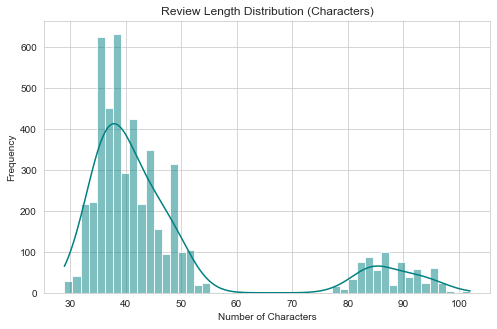

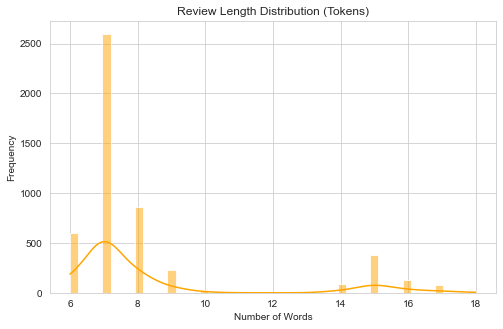

In [14]:
# Review length distribution (characters)
plt.figure(figsize=(8,5))
sns.histplot(df['length_chars'], bins=50, kde=True, color='teal')
plt.title("Review Length Distribution (Characters)")
plt.xlabel("Number of Characters")
plt.ylabel("Frequency")
plt.show()

# Review length distribution (tokens)
plt.figure(figsize=(8,5))
sns.histplot(df['length_tokens'], bins=50, kde=True, color='orange')
plt.title("Review Length Distribution (Tokens)")
plt.xlabel("Number of Words")
plt.ylabel("Frequency")
plt.show()


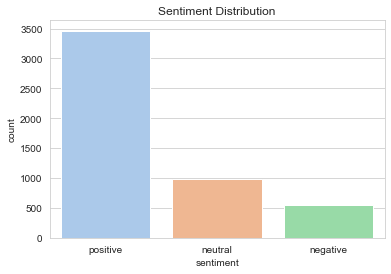

In [15]:
plt.figure(figsize=(6,4))
sns.countplot(x='sentiment', data=df, palette='pastel')
plt.title("Sentiment Distribution")
plt.show()


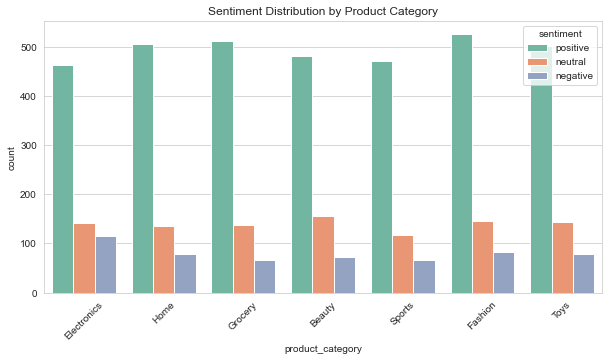

In [16]:
plt.figure(figsize=(10,5))
sns.countplot(x='product_category', hue='sentiment', data=df, palette='Set2')
plt.title("Sentiment Distribution by Product Category")
plt.xticks(rotation=45)
plt.show()


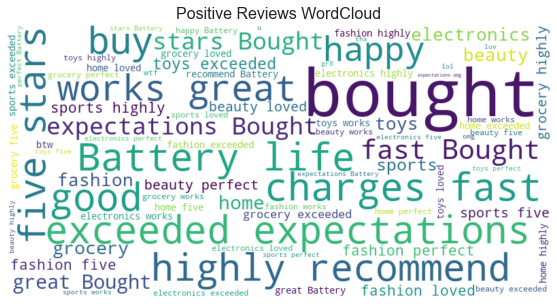

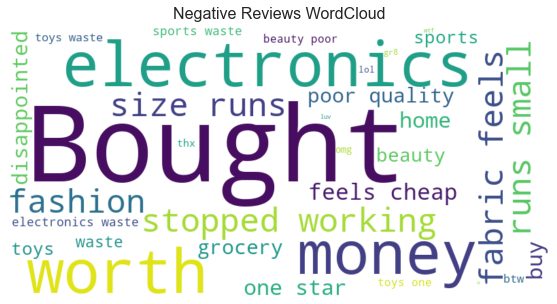

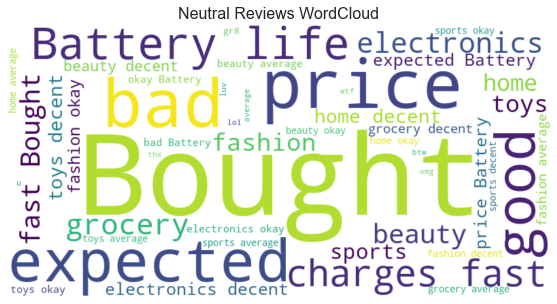

In [17]:
# Function to plot wordcloud
def plot_wordcloud(text, title=None):
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
    plt.figure(figsize=(10,5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    if title:
        plt.title(title, fontsize=16)
    plt.show()

# Positive reviews
positive_text = " ".join(df[df['sentiment']=='positive']['review_text'])
plot_wordcloud(positive_text, "Positive Reviews WordCloud")

# Negative reviews
negative_text = " ".join(df[df['sentiment']=='negative']['review_text'])
plot_wordcloud(negative_text, "Negative Reviews WordCloud")

# Neutral reviews
neutral_text = " ".join(df[df['sentiment']=='neutral']['review_text'])
plot_wordcloud(neutral_text, "Neutral Reviews WordCloud")


In [18]:
# Function to get top n n-grams
def get_top_ngrams(corpus, ngram_range=(1,1), top_n=20):
    vec = CountVectorizer(ngram_range=ngram_range, stop_words='english').fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:top_n]

# Example: top 20 unigrams
top_unigrams = get_top_ngrams(df['review_text'], ngram_range=(1,1))
print("Top 20 Unigrams:", top_unigrams)

# Top bigrams
top_bigrams = get_top_ngrams(df['review_text'], ngram_range=(2,2))
print("Top 20 Bigrams:", top_bigrams)

# Top trigrams
top_trigrams = get_top_ngrams(df['review_text'], ngram_range=(3,3))
print("Top 20 Trigrams:", top_trigrams)


Top 20 Unigrams: [('bought', 5000), ('fashion', 755), ('toys', 724), ('electronics', 720), ('home', 720), ('grocery', 717), ('beauty', 708), ('sports', 656), ('battery', 605), ('life', 605), ('good', 605), ('charges', 605), ('fast', 605), ('buy', 506), ('exceeded', 468), ('expectations', 468), ('loved', 452), ('highly', 447), ('recommend', 447), ('happy', 426)]
Top 20 Bigrams: [('bought fashion', 755), ('bought toys', 724), ('bought electronics', 720), ('bought home', 720), ('bought grocery', 717), ('bought beauty', 708), ('bought sports', 656), ('battery life', 605), ('life good', 605), ('good charges', 605), ('charges fast', 605), ('exceeded expectations', 468), ('highly recommend', 447), ('works great', 406), ('decent price', 214), ('toys exceeded', 92), ('home buy', 91), ('waste money', 89), ('stopped working', 84), ('electronics buy', 82)]
Top 20 Trigrams: [('battery life good', 605), ('life good charges', 605), ('good charges fast', 605), ('bought toys exceeded', 92), ('toys exce

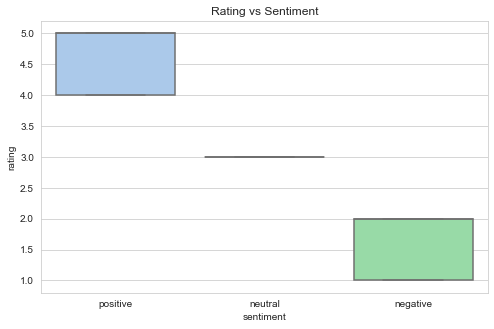

In [19]:
plt.figure(figsize=(8,5))
sns.boxplot(x='sentiment', y='rating', data=df, palette='pastel')
plt.title("Rating vs Sentiment")
plt.show()


In [20]:
# Optional tosave summary statistics
eda_summary_path = "../data/eda_summary.csv"
df.describe(include='all').to_csv(eda_summary_path)
print(f"EDA summary saved to {eda_summary_path}")


EDA summary saved to ../data/eda_summary.csv
